# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Ikrar Bagaskara
- **Email:** ikrarb95@gmail.com
- **ID Dicoding:** ikrar557

## Menentukan Pertanyaan Bisnis

-  Bagaimana cuaca dan jam memengaruhi jumlah peminjaman sepeda?
-  Apakah terdapat perbedaan dalam penggunaan sepeda berdasarkan musim?
-  Siapa yang lebih aktif menggunakan sepeda, pengguna terdaftar atau non-terdaftar setiap tahunnya?
-  Bagaimana pengaruh hari kerja dan hari libur terhadap penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
# mendefinisikan library yang akan digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

## Data Wrangling

### Gathering Data

_1.1 membaca dataset day.csv yang akan digunakan_

In [3]:
days_df = pd.read_csv('data/day.csv')
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


_1.2 membaca dataset hour.csv yang akan digunakan_


In [4]:
hours_df = pd.read_csv('data/hour.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- dataset `day.csv` dan `hour.csv` saling melengkapi satu sama lain, dimana dataset `hour.csv` memiliki kolom **hr** atau **jam** yang dapat membantu menganalisis pola peminjaman pada tingkat jam
- selanjutnya, kedua dataset `day.csv` dan `hour.csv` memiliki kolom-kolom yang hampir sama seperti `dteday`, `season`, dan lainnya.
- kedua dataset memiliki cakupan waktu selama 2 tahun (2011 dan 2012), dapat memberikan rentang waktu yang cukup untuk dilakukan analisis tren.

### Assessing Data

_2.1 memeriksa tipe data di tiap kolom dataset day.csv dan hour.csv_


In [5]:
days_df.info()
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

_2.2 memeriksa jumlah missing value pada dataset day.csv_


In [6]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

_2.3 memeriksa jumlah missing value pada dataset hour.csv_

In [7]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

_2.4 memeriksa jumlah duplikasi pada dataset day.csv dan hour.csv_

In [8]:
print("Jumlah duplikasi dataset 'day.csv': ", days_df.duplicated().sum())
print("Jumlah duplikasi dataset 'hour.csv: ", hours_df.duplicated().sum())

Jumlah duplikasi dataset 'day.csv':  0
Jumlah duplikasi dataset 'hour.csv:  0


_2.5 memeriksa nilai statistik yang terdapat pada dataset day.csv_

In [9]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


_2.6 memeriksa nilai statistik yang terdapat pada dataset hour.csv_


In [10]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- pada kedua dataset, baik `day.csv` dan `hour.csv` tidak terdapat nilai **null** atau **missing** dan pada dataset juga tidak terdapat nilai duplikasi
- tapi pada kedua dataset, kolom `dteday` memiliki tipe data yang kurang sesuai, yaitu _object_ yang nanti akan kita convert ke _datetime_

### Cleaning Data

_3.1 menghapus kolom `instant` dan `workingday` pada dataset day.csv dan hour.csv, karena kolom `instant` berisi **indexing** yang tidak relevan untuk dilakukan analisis data. Dan kolom `workingday` memiliki arti yang kurang lebih sama dengan kolom `weekday` sehingga bisa kita gunakan kolom `weekday` saja._

In [11]:
days_df.drop(['instant', 'workingday'], axis=1, inplace=True)
hours_df.drop(['instant', 'workingday'], axis=1, inplace=True)

_3.2 mengubah tipe data pada kolom `dteday` yang dari **object** ke **datetime**_

In [12]:
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

_3.3 mengubah tipe data `int` menjadi `category` pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'_


In [13]:
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
 
for column in columns:
    days_df[column] =  days_df[column].astype("category")
    hours_df[column] =  hours_df[column].astype("category")

_3.4 mengganti nama kolom pada dataset day.csv agar lebih mudah dipahami_

In [14]:
days_df.rename(columns={
    'yr':'year',
    'mnth':'month',
    'weathersit':'weather_situation', 
    'windspeed':'wind_speed',
    'cnt':'count',
    'hum':'humidity'
    }, inplace=True)

days_df.head(1)

,dteday,season,year,month,holiday,weekday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count
0,2011-01-01,1,0,1,0,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985


_3.5 mengganti nama kolom pada dataset hour.csv agar lebih mudah dipahami_

In [15]:
hours_df.rename(columns={
    'yr':'year',
    'hr':'hours',
    'mnth':'month',
    'weathersit':'weather_situation',
    'windspeed':'wind_speed',
    'cnt':'count',
    'hum':'humidity'
    }, inplace=True)

hours_df.head(1)

,dteday,season,year,month,hours,holiday,weekday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16


_3.6 mengkonversi nilai pada dataset menjadi nilai yang lebih mudah dipahami dan memiliki konteks jelas_

_3.6.1 mengubah nilai pada kolom `season`_

In [16]:
season_mapping = {
    1: 'springer', 
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

days_df['season'] = days_df['season'].astype('category').cat.rename_categories(season_mapping)
hours_df['season'] = hours_df['season'].astype('category').cat.rename_categories(season_mapping)
days_df.head()

,dteday,season,year,month,holiday,weekday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count
0,2011-01-01,springer,0,1,0,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,springer,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,springer,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,springer,0,1,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,springer,0,1,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


_3.6.2 mengubah nilai pada kolom `month`_


In [17]:
month_mapping = {
    1: 'january', 
    2: 'february', 
    3: 'march', 
    4: 'april', 
    5: 'may', 
    6: 'june', 
    7: 'july', 
    8: 'august', 
    9: 'september', 
    10: 'october', 
    11: 'november', 
    12: 'december'
}

days_df['month'] = days_df['month'].astype('category').cat.rename_categories(month_mapping)
hours_df['month'] = hours_df['month'].astype('category').cat.rename_categories(month_mapping)

_3.6.3 mengubah nilai pada kolom `weekdays`_

In [18]:
weekday_mapping = {
    0: 'sunday', 
    1: 'monday', 
    2: 'tuesday', 
    3: 'wednesday', 
    4: 'thursday', 
    5: 'friday', 
    6: 'saturday'
}

days_df['weekday'] = days_df['weekday'].astype('category').cat.rename_categories(weekday_mapping)
hours_df['weekday'] = hours_df['weekday'].astype('category').cat.rename_categories(weekday_mapping)

_3.6.4 mengubah nilai pada kolom `weather_situation`_


In [19]:
weather_mapping = {
    1: 'clear', 
    2: 'cloudy', 
    3: 'light_rain', 
    4: 'heavy_rain'
}

days_df['weather_situation'] = days_df['weather_situation'].astype('category').cat.rename_categories(weather_mapping)
hours_df['weather_situation'] = hours_df['weather_situation'].astype('category').cat.rename_categories(weather_mapping)

_3.6.5 mengubah nilai pada kolom `year`_

In [20]:
year_mapping = {
    0: 2011, 
    1: 2012
}

days_df['year'] = days_df['year'].replace(year_mapping)
hours_df['year'] = hours_df['year'].replace(year_mapping)

_3.6.6 menghitung nilai pada kolom `humidity`_

In [21]:
days_df['humidity'] = days_df['humidity']*100
hours_df['humidity'] = hours_df['humidity']*100

_3.7 membuat kolom baru untuk menyimpan kategori dari hari, apakah **weekend** atau **weekdays**_

In [22]:
def get_category_days(weekday_mapping):
    if weekday_mapping in ["saturday", "sunday"]:
        return "weekend"
    else: 
        return "weekdays"

days_df["category_days"] = days_df["weekday"].apply(get_category_days)
hours_df["category_days"] = hours_df["weekday"].apply(get_category_days)

_3.8 membuat kolom baru untuk menyimpan kategory dari `humidity` atau kelembapan_

In [23]:
def classify_humidity(humidity):
    if humidity < 45:
        return "terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "ideal"
    else:
        return "terlalu lembab"

days_df["humidity_category"] = days_df["humidity"].apply(classify_humidity)
hours_df["humidity_category"] = hours_df["humidity"].apply(classify_humidity)

**Insight:**
- kolom `instant` sudah dihapus karena kolom tersebut tidak memiliki relevansi terhadap data yang akan di analisis, dan kolom `workingday` juga dihapus karena kolom `weekday` sudah cukup untuk mewakili data yang ada pada kolom `workingday`
- kita juga berhasil mengganti tipe data pada kolom `dteday` yang semula _object_ menjadi _datetime_ agar lebih sesuai dengan value.
- disini kita juga mengganti beberapa kolom seperti `season`, `mnth`, `holiday`, `weekday`, `weathersit` ke bentuk _caterogical_ karena valuenya memiliki berbentuk varian.
- beberapa kolom juga kita ganti namanya agar lebih mudah dipahami
- membuat kolom baru `category_days` untuk menentukan apakah hari tersebut hari weekend atau tidak, yang akan berguna untuk melakukan analisis nantinya.

## Exploratory Data Analysis (EDA)

### Explore Data hour.csv

_4.1 melihat ringkasan statistik dari dataset day.csv_

In [24]:
hours_df.describe(include='all')

,dteday,season,year,month,hours,holiday,weekday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count,category_days,humidity_category
count,17379,17379,17379.000000,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,4,NaN,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,fall,NaN,july,NaN,0.0,saturday,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,terlalu lembab
freq,NaN,4496,NaN,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


_4.2 menghitung pengaruh cuaca dan jam dalam jumlah peminjaman sepeda_

In [25]:
# Mengelompokkan berdasarkan 'weather_situation' dan 'hours', lalu menjumlahkan 'count'
result = hours_df.groupby(by=['weather_situation', 'hours']).agg({
    'count': 'sum'
}).reset_index()

# Mengambil 10 nilai tertinggi pada kolom 'count'
top_10 = result.nlargest(10, 'count')

print(top_10)


   weather_situation  hours   count
17             clear     17  253718
18             clear     18  229220
16             clear     16  171230
19             clear     19  171073
8              clear      8  158998
15             clear     15  133486
13             clear     13  131209
14             clear     14  127726
20             clear     20  127332
12             clear     12  124915


/var/folders/lm/ytx_hwqs48z736wkx85xxhq00000gn/T/ipykernel_12872/1901254346.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = hours_df.groupby(by=['weather_situation', 'hours']).agg({


_4.3 menghitung pengaruh perbedaan musim dalam penggunaan sepeda_

In [26]:
hours_df.groupby(by='season').agg({
    'count': 'sum',
    'temp': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean'
}).reset_index()

/var/folders/lm/ytx_hwqs48z736wkx85xxhq00000gn/T/ipykernel_12872/3038330927.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hours_df.groupby(by='season').agg({


,season,count,temp,humidity,wind_speed
0,springer,471348,0.299147,58.134842,0.215107
1,summer,918589,0.544663,62.702200,0.203410
2,fall,1061129,0.706410,63.316726,0.171593
3,winter,841613,0.423138,66.712429,0.170819


### Explore Data day.csv

_4.4 melihat ringkasan statistik dari dataset hour.csv_

In [27]:
days_df.describe(include="all")

,dteday,season,year,month,holiday,weekday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count,category_days,humidity_category
count,731,731,731.000000,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,4,NaN,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,fall,NaN,january,0.0,sunday,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,ideal
freq,NaN,188,NaN,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


_4.5 menghitung siapa yang lebih aktif dalam peminjaman sepeda, pengguna terdaftar atau non terdaftar setiap tahunnya_

In [28]:
days_df.groupby(by=['year', 'month']).agg({
    "registered": ["sum"],
    "casual": ["sum"]
}).reset_index()

/var/folders/lm/ytx_hwqs48z736wkx85xxhq00000gn/T/ipykernel_12872/2921255897.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by=['year', 'month']).agg({


,year,month,registered,casual
,,,sum,sum
0,2011,january,35116,3073
1,2011,february,41973,6242
2,2011,march,51219,12826
3,2011,april,72524,22346
4,2011,may,104771,31050
5,2011,june,112900,30612
6,2011,july,104889,36452
7,2011,august,107849,28842
8,2011,september,100873,26545


_4.6 menghitung pengaruh hari kerja dan hari libur terhadap penggunaan sepeda_

In [29]:
days_df.groupby(by='category_days').agg({
    'count': 'sum'
}).reset_index()

,category_days,count
0,weekdays,2370845
1,weekend,921834


**Insight:**
- pada point 4.1 kita bisa melihat rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah pelanggan sebanyak 17379. dengan range waktu antara jam 00.00 sampai 23.59, dan memilliki rata-rata penyewaan sepeda terjadi pada jam 11.54 dengan standar deviasinya sebesar 6.91
- pada point 4.2 kita bisa melihat bahwa peminjaman didominasi pada sore hari seperti jam `16.00`, `17.00`, `18.00` dengan cuaca yang terang atau **clear**
- sedangkan pada point 4.3 season **fall** menjadi season yang paling ramai untuk peminjaman sepeda
- pada point 4.5 terlihat tahun 2012 mengalami peningkatan baik untuk **casual user** atau **registered user** ketimbang tahun 2011
- dan pada point 4.6, hari kerja mendominasi pinjaman dengan margin yang tinggi daripada akhir pekan

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca dan jam memengaruhi jumlah peminjaman sepeda?

/var/folders/lm/ytx_hwqs48z736wkx85xxhq00000gn/T/ipykernel_12872/4180688264.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = hours_df.groupby(['hours', 'weather_situation'])['count'].sum().unstack()


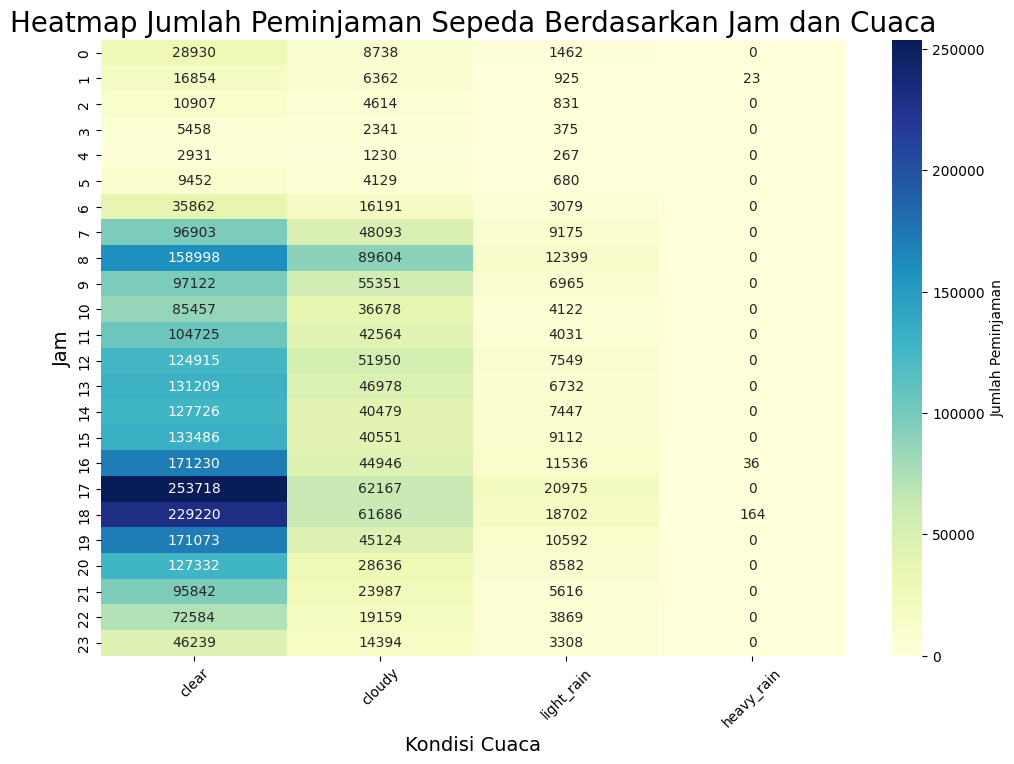

In [30]:
# Menghitung total peminjaman berdasarkan jam dan kondisi cuaca
heatmap_data = hours_df.groupby(['hours', 'weather_situation'])['count'].sum().unstack()

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    annot=True,  # Menampilkan angka di dalam heatmap
    fmt='g',     # Format angka
    cbar_kws={'label': 'Jumlah Peminjaman'},
)

# Mengatur judul dan label
plt.title('Heatmap Jumlah Peminjaman Sepeda Berdasarkan Jam dan Cuaca', fontsize=20)
plt.xlabel('Kondisi Cuaca', fontsize=14)
plt.ylabel('Jam', fontsize=14)
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih terbaca

# Menampilkan plot
plt.show()

### Pertanyaan 2: Apakah terdapat perbedaan dalam penggunaan sepeda berdasarkan musim?

/var/folders/lm/ytx_hwqs48z736wkx85xxhq00000gn/T/ipykernel_12872/1091462806.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_rentals_by_season = days_df.groupby('season')['count'].sum().reset_index()
/var/folders/lm/ytx_hwqs48z736wkx85xxhq00000gn/T/ipykernel_12872/1091462806.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


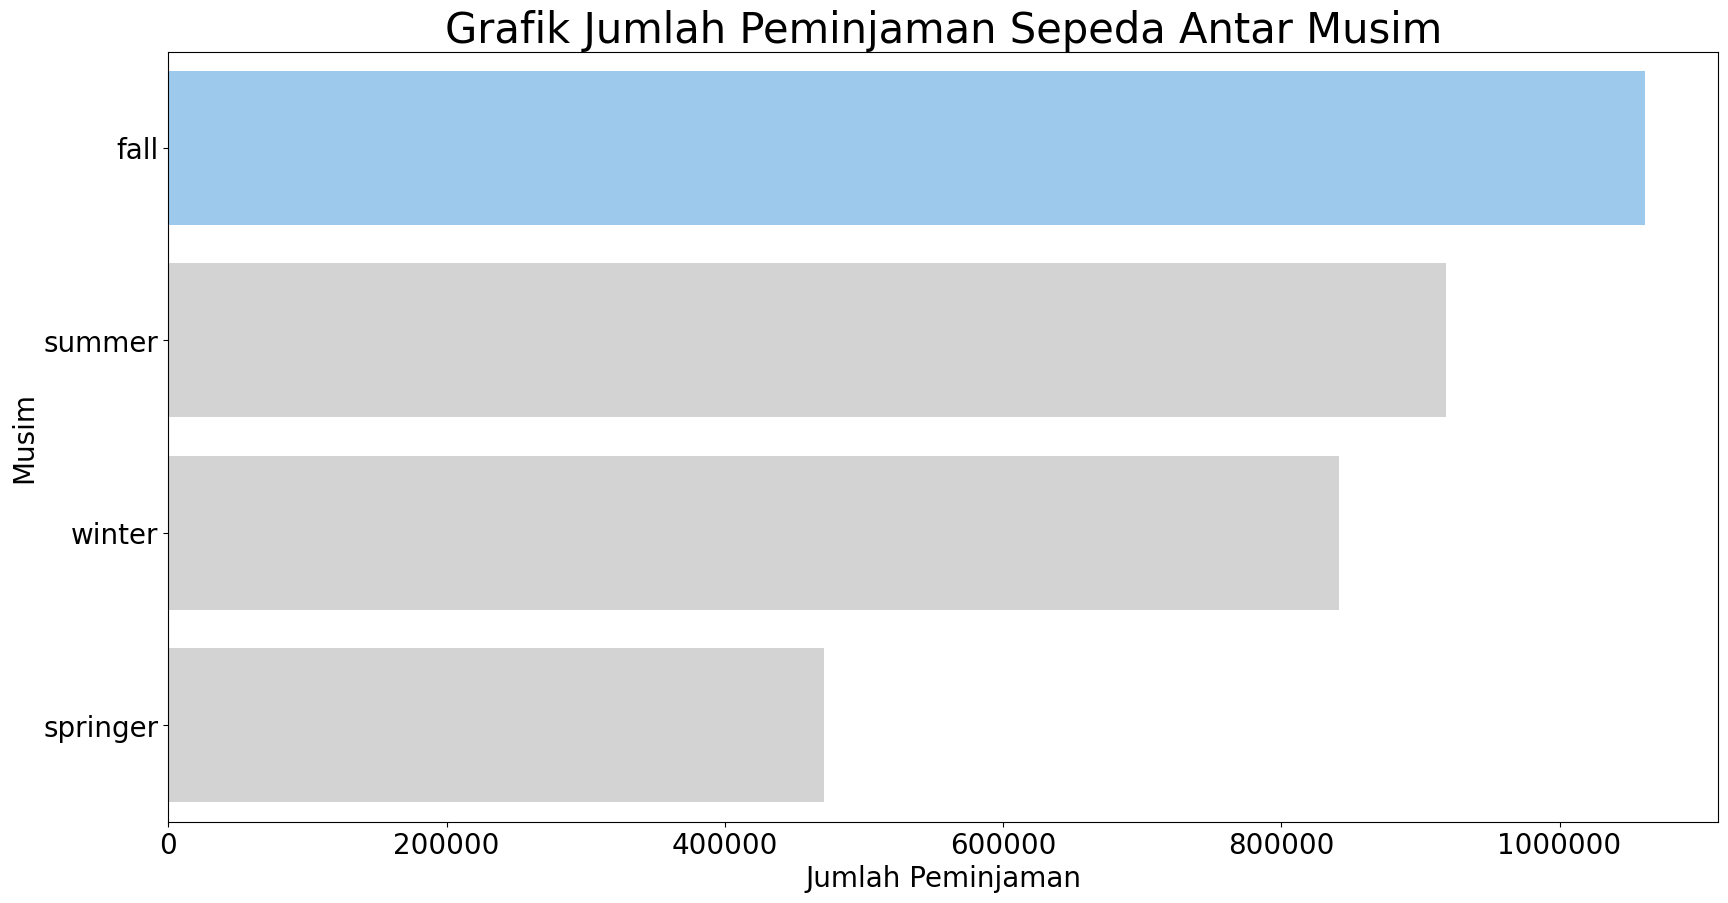

In [31]:
# Mengatur warna
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Menghitung total peminjaman berdasarkan musim
total_rentals_by_season = days_df.groupby('season')['count'].sum().reset_index()

# Mengurutkan data berdasarkan jumlah peminjaman secara menurun
total_rentals_by_season = total_rentals_by_season.sort_values(by='count', ascending=False)

# Membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Buat barplot untuk count dan season, menggunakan data total_rentals_by_season
sns.barplot(
        x="count", 
        y="season",
        data=total_rentals_by_season,
        palette=colors,
        order=total_rentals_by_season['season'],
        ax=ax
    )

# Mengatur judul, label y dan x untuk subplot tersebut
ax.set_title("Grafik Jumlah Peminjaman Sepeda Antar Musim", loc="center", fontsize=30)
ax.set_ylabel("Musim", fontsize=20)
ax.set_xlabel("Jumlah Peminjaman", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Mengatur format angka pada sumbu x
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:0.0f}'))  

# Menampilkan plot
plt.show()

### Pertanyaan 3: Siapa yang lebih aktif menggunakan sepeda, pengguna terdaftar atau non-terdaftar setiap tahunnya?

/var/folders/lm/ytx_hwqs48z736wkx85xxhq00000gn/T/ipykernel_12872/2486922543.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_rentals = hours_df.groupby(['year', 'month']).agg({


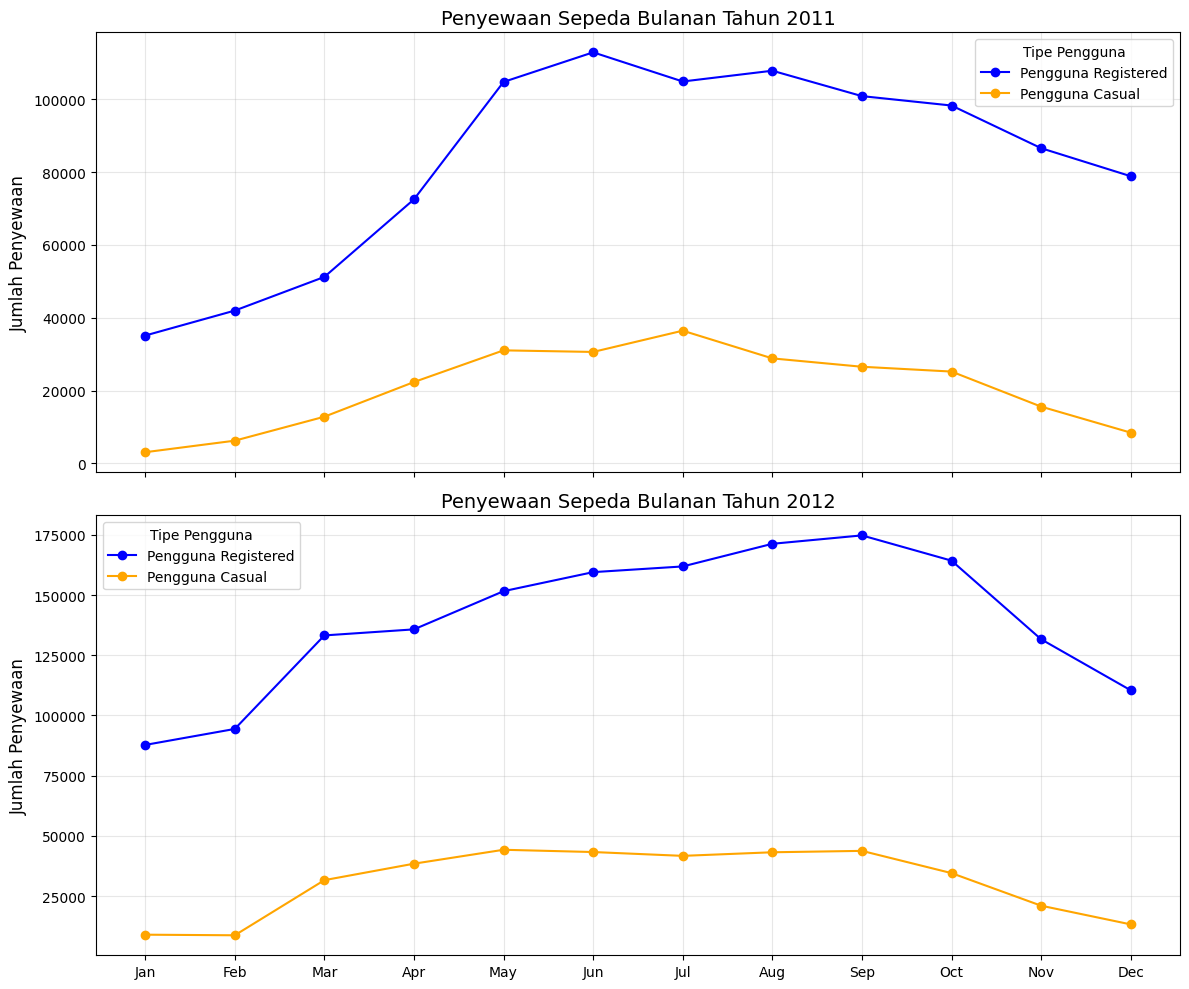

In [32]:
# Menjumlahkan penyewaan per bulan untuk pengguna registered dan casual
monthly_rentals = hours_df.groupby(['year', 'month']).agg({
    'registered': 'sum',
    'casual': 'sum'
}).reset_index()

# Membuat subplot dengan 2 baris dan 1 kolom dengan ukuran 12 x 10
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Membuat grafik untuk data tahun 2011
data_2011 = monthly_rentals[monthly_rentals['year'] == 2011]
axes[0].plot(
    data_2011['month'], 
    data_2011['registered'], 
    marker='o', 
    label='Pengguna Registered', 
    color='blue'
)
axes[0].plot(
    data_2011['month'], 
    data_2011['casual'], 
    marker='o', 
    label='Pengguna Casual', 
    color='orange'
)

# Mengatur informasi untuk plot ke 1 seperti judul, label sumbu Y, legend, dan grid
axes[0].set_title('Penyewaan Sepeda Bulanan Tahun 2011', fontsize=14)
axes[0].set_ylabel('Jumlah Penyewaan', fontsize=12)
axes[0].legend(title="Tipe Pengguna", fontsize=10)
axes[0].grid(alpha=0.3)

# Membuat grafik untuk data tahun 2012
data_2012 = monthly_rentals[monthly_rentals['year'] == 2012]
axes[1].plot(
    data_2012['month'], 
    data_2012['registered'], 
    marker='o', 
    label='Pengguna Registered', 
    color='blue'
)
axes[1].plot(
    data_2012['month'], 
    data_2012['casual'], 
    marker='o', 
    label='Pengguna Casual', 
    color='orange'
)

# Mengatur informasi untuk plot ke 2 seperti judul, label sumbu Y, legend, dan grid
axes[1].set_title('Penyewaan Sepeda Bulanan Tahun 2012', fontsize=14)
axes[1].set_ylabel('Jumlah Penyewaan', fontsize=12)
axes[1].legend(title="Tipe Pengguna", fontsize=10)
axes[1].grid(alpha=0.3)

# Mengatur label untuk sumbu X
axes[1].set_xticks(range(0, 12))
axes[1].set_xticklabels([
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])

# menampilan plot
plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana pengaruh hari kerja dan hari libur terhadap penggunaan sepeda?

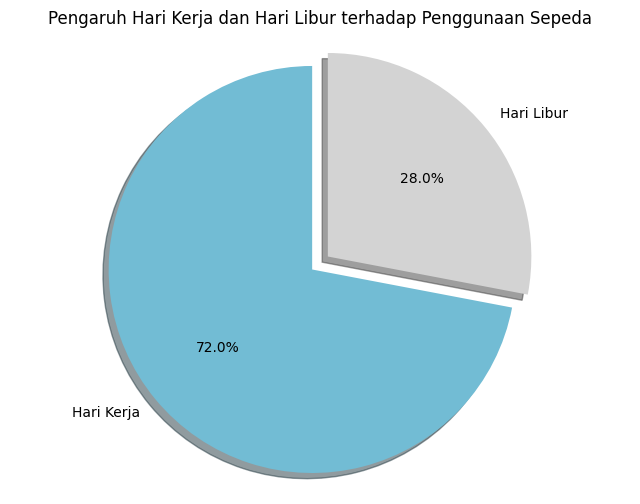

In [33]:
# Menghitung total peminjaman untuk hari kerja dan hari libur
usage_by_category = days_df.groupby('category_days')['count'].sum().reset_index()

# Mengganti label
labels = usage_by_category['category_days'].replace({
    'weekend': 'Hari Libur',
    'weekdays': 'Hari Kerja'
})

# Menentukan ukuran untuk setiap kategori
sizes = usage_by_category['count']

# mengatur warna pada pie chart
colors = ["#72BCD4", "#D3D3D3"]

# memberikan efek tonjolan pada hari libur
explode = (0.1, 0) 

# Membuat pie chart dengan ukuran 8 x 6 dan menambahkan ukuran, label, warna, dan efek tonjolan
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# mengatur pie chart agar tetap lingkaran
plt.axis('equal')

# menambahkan judul pada pie chart
plt.title('Pengaruh Hari Kerja dan Hari Libur terhadap Penggunaan Sepeda')

# menampilkan pie chart
plt.show()

**Insight:**
- pada visualisasi pertama kita bisa melihat bahwa peminjaman sepeda paling sering terjadi pada sore hari pukul 17.00 di waktu hari yang cerah dengan angka mencapai **253718** sedangkan di saat cuaca yang hujan deras, peminjaman sepeda kebanyakan berada di angka 0.
- berikutnya pada visualisasi kedua, musim `fall` menjadi musim yang paling ramai untuk peminjaman sepeda di ikuti oleh musim `summer`, `winter` dan yang terakhir `spring`
- visualisasi ketiga memberikana gambaran bahwa baik pada tahun 2011 atau atau 2012, **registered user** lebih sering melakukan peminjaman daripada user biasa atau **casual user**
- dan terakhir pada visualisasi keempat terlihat pada hari biasa peminjaman sepeda jauh lebih diminati daripada saat hari libur atau hari akhir pekan

## Analisis Lanjutan (Opsional)

_5.1 RFM Analysis_

RFM Analysis dibawah ini digunakan untuk memahami perilaku pelanggan dari tiga faktor utama:

- Recency (seberapa baru pelanggan berinteraksi dengan bisnis)
- Frequency (banyaknya pelanggan dalam berinteraksi)
- Monetary (banyaknya uang yang mereka gunakan)

In [ ]:
# Mengambil tanggal terakhir dalam dataset
current_date = max(hours_df['dteday'])

# Menghitung RFM metrics
rfm_df = hours_df.groupby('registered').agg(
    Recency=('dteday', lambda x: (current_date - x.max()).days),  # Recency
    Frequency=('dteday', 'count'),  # Frequency (jumlah total transaksi)
    Monetary=('count', 'sum')  # Monetary (jumlah total peminjaman)
).reset_index()

print(rfm_df.head())


   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


_5.1.1 Membuat visualiasi untuk RFM analysis_

/var/folders/lm/ytx_hwqs48z736wkx85xxhq00000gn/T/ipykernel_12872/3939483125.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/lm/ytx_hwqs48z736wkx85xxhq00000gn/T/ipykernel_12872/3939483125.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/lm/ytx_hwqs48z736wkx85xxhq00000gn/T/ipykernel_12872/3939483125.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


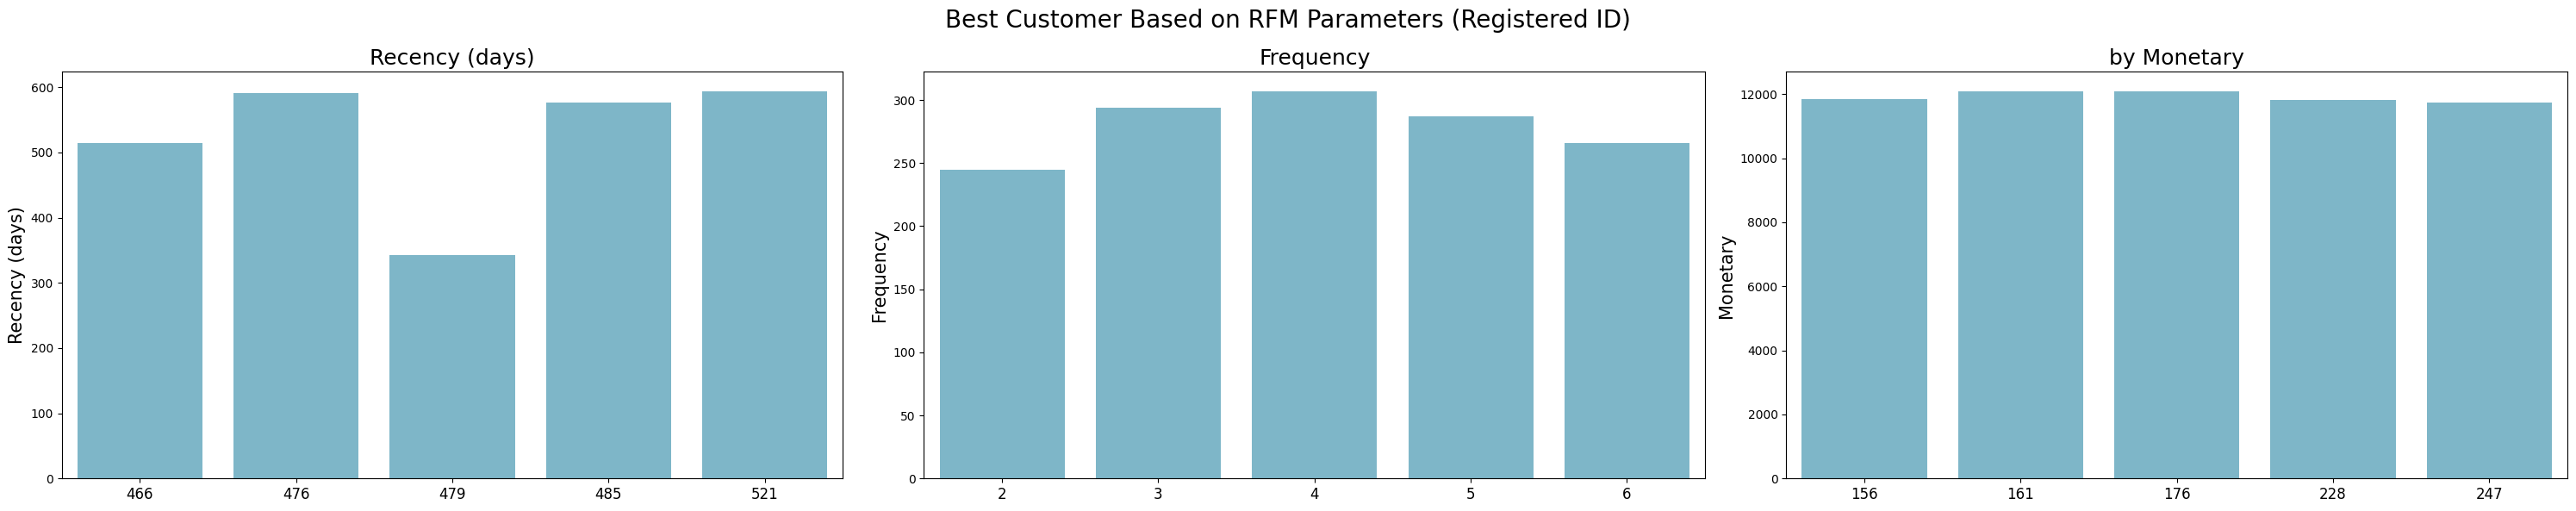

In [65]:
# Mengatur ukuran plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4"] * 5

# Membuat grafik batang untuk Recency
sns.barplot(
    y="Recency",
    x="registered",
    data=rfm_df.sort_values(by="Recency", ascending=False).head(5),
    palette=colors,
    ax=ax[0],
)
ax[0].set_ylabel("Recency (days)", fontsize=15)
ax[0].set_xlabel(None)
ax[0].set_title("Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis="x", labelsize=12)

# Membuat grafik batang untuk Frequency
sns.barplot(
    y="Frequency",
    x="registered",
    data=rfm_df.sort_values(by="Frequency", ascending=False).head(5),
    palette=colors,
    ax=ax[1],
)
ax[1].set_ylabel("Frequency", fontsize=15)
ax[1].set_xlabel(None)
ax[1].set_title("Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis="x", labelsize=12)

# Membuat grafik batang untuk Monetary
sns.barplot(
    y="Monetary",
    x="registered",
    data=rfm_df.sort_values(by="Monetary", ascending=False).head(5),
    palette=colors,
    ax=ax[2],
)
ax[2].set_ylabel("Monetary", fontsize=15)
ax[2].set_xlabel(None)
ax[2].set_title("by Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis="x", labelsize=12)

# Menambahkan super title untuk chart
plt.suptitle("Best Customer Based on RFM Parameters (Registered ID)", fontsize=20)

plt.tight_layout()

# Menampilkan chart
plt.show()


_5.2 Clustering Analysis_

_5.3.1 Penjelasan tujuan dan alasan clustering dengan manual grouping_

Mengelompokkan suhu ke dalam kategori seperti `Rendah,` `Sedang,` dan `Tinggi` untuk memberikan gambaran pengaruh suhu atau temperature terhadap persentase jumlah pinjaman, dengan ini kita dapat mengetahui apakah tingkat suhu memberikan pengaruh terhadap pinjaman sepeda.

In [49]:
def temperature_group(value):
    if value <= 0.33:
        return 'Rendah'
    elif value <= 0.66:
        return 'Sedang'
    else:
        return 'Tinggi'

# Menambahkan kolom Temperature Group
hours_df['Temperature_Group'] = hours_df['temp'].apply(temperature_group)

# Menampilkan beberapa data untuk memeriksa kolom baru
print(hours_df[['temp', 'Temperature_Group']].head(10))

   temp Temperature_Group
0  0.24            Rendah
1  0.22            Rendah
2  0.22            Rendah
3  0.24            Rendah
4  0.24            Rendah
5  0.24            Rendah
6  0.22            Rendah
7  0.20            Rendah
8  0.24            Rendah
9  0.32            Rendah


/var/folders/lm/ytx_hwqs48z736wkx85xxhq00000gn/T/ipykernel_12872/2137382741.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temperature_counts.index, y=temperature_counts.values, palette='viridis')


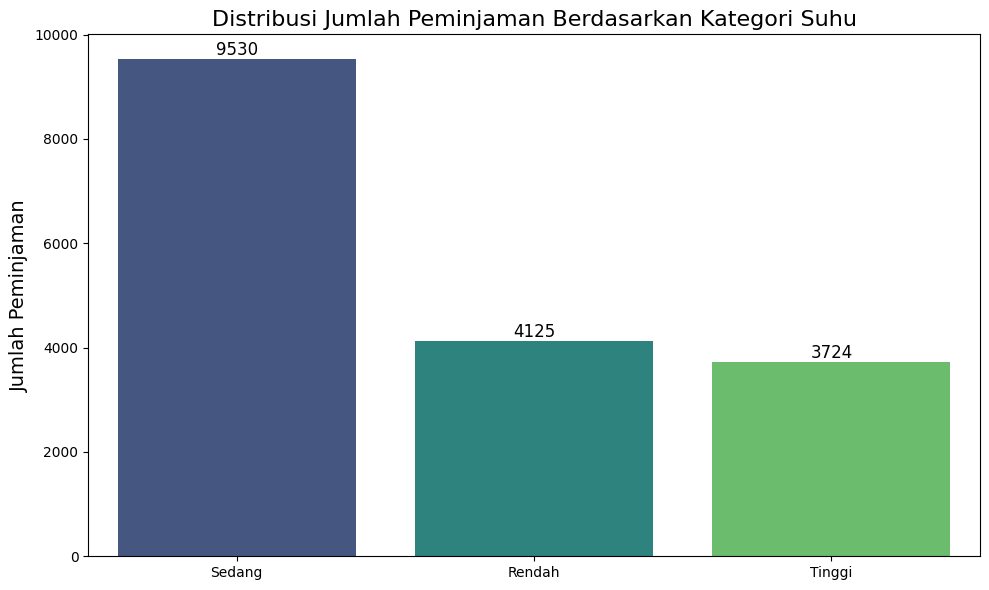

In [50]:
# Menghitung jumlah peminjaman berdasarkan Temperature_Group
temperature_counts = hours_df['Temperature_Group'].value_counts()

# Mengatur ukuran plot
plt.figure(figsize=(10, 6))

# Membuat bar plot
sns.barplot(x=temperature_counts.index, y=temperature_counts.values, palette='viridis')

# Mengatur judul dan label x, dan y
plt.title('Distribusi Jumlah Peminjaman Berdasarkan Kategori Suhu', fontsize=16)
plt.xlabel(None)
plt.ylabel('Jumlah Peminjaman', fontsize=14)

# Menampilkan nilai pada setiap batang
for i, value in enumerate(temperature_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=12)

# Menampilkan grafik plot
plt.tight_layout()
plt.show()


## Conclusion

- Conclution pertanyaan 1: bahwa penyewaan sepda paling banyak digunakan pada jam 17:00 dan saat cuaca cerah. Kontras dengan hal tersebut, penyewaan pada cuaca hujan deras sangat sepi bahkan penyewaan hanya terjadi pada pukul `01.00`, `16.00`, dan `18.00`.
- Conclution pertanyaan 2: musim `fall` menjadi musim dimana user lebih sering melakukan peminjaman sepeda daripada musim lainnya.
- Conclution pertanyaan 3: Baik pada tahun 2011 dan tahun 2012, tercatat user **registered** lebih banyak melakukan pinjaman daripada user **casual** dan tahun 2012 mengalami peningkaan peminjaman baik dari user **registered** dan user **casual**.
- Conclution pertanyaan 4: peminjaman sepeda lebih banyak dilakukan pada **weekday** hingga 72% dari total pinjaman daripada oleh **weekend** yang hanya berada di angka 28%.